# Armslist Illinois gun sale listings analysis

What can we learn about gray-market gun sales in Illinois? 

Data scraped 2017-07-25.

## Setup and utilities

Skip down to read the analysis. If you don't care about code, skip the stuff in gray boxes :)

In [41]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import re

plt.style.use('fivethirtyeight')
matplotlib.rcParams['figure.figsize'] = (14, 6)
matplotlib.rcParams['font.size'] = 9

In [39]:
df = pd.read_csv('../cache/listings.csv', parse_dates=['listed_date'])

# Basic counts

All value counts have both raw and normalized (essentially %, but expressed as a fraction of 1).

In [3]:
total_listings = len(df)
min_date = df['listed_date'].min()

There are **{{total_listings}}** listings since {{min_date}}.

### "Category" counts

In [4]:
df['category'].value_counts()

Handguns            1357
Rifles               819
Shotguns             284
Antique Firearms      29
NFA Firearms           6
Muzzle Loaders         3
Name: category, dtype: int64

In [5]:
df['category'].value_counts(normalize=True)

Handguns            0.543235
Rifles              0.327862
Shotguns            0.113691
Antique Firearms    0.011609
NFA Firearms        0.002402
Muzzle Loaders      0.001201
Name: category, dtype: float64

### "Firearm type" counts

It's not clear how this is different than category in Armslist's eyes.

In [6]:
df['firearm_type'].value_counts()

Pistol           1136
Rifle             817
Shotgun           283
Revolver          147
Derringer          14
Muzzle Loader       3
Name: firearm_type, dtype: int64

In [7]:
df['firearm_type'].value_counts(normalize=True)

Pistol           0.473333
Rifle            0.340417
Shotgun          0.117917
Revolver         0.061250
Derringer        0.005833
Muzzle Loader    0.001250
Name: firearm_type, dtype: float64

### "Action" counts (e.g. semiautomatic)

In [8]:
df['action'].value_counts()

Semi-automatic            564
Striker Fire              336
Double / Single Action    295
Single Action             259
Double Action             174
Bolt Action               172
Pump Action               149
Over and Under             36
Lever Action               35
Single Shot                27
Break Open                 16
Side by Side               12
Name: action, dtype: int64

In [9]:
df['action'].value_counts(normalize=True)

Semi-automatic            0.271807
Striker Fire              0.161928
Double / Single Action    0.142169
Single Action             0.124819
Double Action             0.083855
Bolt Action               0.082892
Pump Action               0.071807
Over and Under            0.017349
Lever Action              0.016867
Single Shot               0.013012
Break Open                0.007711
Side by Side              0.005783
Name: action, dtype: float64

### "Caliber" counts (top 20)

This appears to be either a long list of options or some form of free text. Definitely many more values here than other top level categories.

In [10]:
df['caliber'].value_counts().head(20)

9mm Luger (9x19)     490
45 ACP               274
12 Gauge             210
22 Long Rifle        189
223/5.56 NATO        177
40 S&W               106
380 ACP               91
5.56×45mm NATO        87
308/7.62 NATO         72
7.62x39               59
357 Magnum            45
20 Gauge              37
7.62x54R              31
38 S&W Special        28
40 cal                25
44 Magnum             16
30-06 Springfield     14
30-30 Winchester      11
22 Magnum             11
45 Long Colt          11
Name: caliber, dtype: int64

In [11]:
df['caliber'].value_counts(normalize=True).head(20)

9mm Luger (9x19)     0.222829
45 ACP               0.124602
12 Gauge             0.095498
22 Long Rifle        0.085948
223/5.56 NATO        0.080491
40 S&W               0.048204
380 ACP              0.041382
5.56×45mm NATO       0.039563
308/7.62 NATO        0.032742
7.62x39              0.026830
357 Magnum           0.020464
20 Gauge             0.016826
7.62x54R             0.014097
38 S&W Special       0.012733
40 cal               0.011369
44 Magnum            0.007276
30-06 Springfield    0.006367
30-30 Winchester     0.005002
22 Magnum            0.005002
45 Long Colt         0.005002
Name: caliber, dtype: float64

### Location counts (top 20)

Lots of messiness here. Interesting that Lake Villa pops up at the top.

In [12]:
df['location'].value_counts().head(20)

Lake Villa                                       500
Chicago                                          126
Saint Charles                                     71
Manhattan (Will County near Joliet/New Lenox)     68
Springfield                                       60
Illinois                                          54
Urbana                                            39
Wauconda                                          37
Joliet                                            25
Freeport                                          24
Rockford                                          23
LeRoy                                             22
Peoria                                            22
belleville                                        21
WAUCONDA                                          19
South Suburbs                                     17
ILLINOIS                                          17
Genoa                                             17
Aurora                                        

In [13]:
df['location'].value_counts(normalize=True).head(20)

Lake Villa                                       0.200160
Chicago                                          0.050440
Saint Charles                                    0.028423
Manhattan (Will County near Joliet/New Lenox)    0.027222
Springfield                                      0.024019
Illinois                                         0.021617
Urbana                                           0.015612
Wauconda                                         0.014812
Joliet                                           0.010008
Freeport                                         0.009608
Rockford                                         0.009207
LeRoy                                            0.008807
Peoria                                           0.008807
belleville                                       0.008407
WAUCONDA                                         0.007606
South Suburbs                                    0.006805
ILLINOIS                                         0.006805
Genoa         

## City counts

This is far more structured than "location".

In [14]:
df['city'].value_counts()

Chicago               1336
Rockford               146
St. Louis              109
Champaign / Urbana      80
Springfield             70
Peoria                  67
Southern Illinois       66
La Salle                44
Bloomington             42
Decatur                 23
Western Illinois        22
Quad Cities             17
Name: city, dtype: int64

In [15]:
df['city'].value_counts(normalize=True)

Chicago               0.660732
Rockford              0.072206
St. Louis             0.053907
Champaign / Urbana    0.039565
Springfield           0.034619
Peoria                0.033136
Southern Illinois     0.032641
La Salle              0.021761
Bloomington           0.020772
Decatur               0.011375
Western Illinois      0.010880
Quad Cities           0.008408
Name: city, dtype: float64

### Manufacuturer counts (top 20)

In [16]:
df['manufacturer'].value_counts().head(20)

Glock                         180
Ruger                         177
Smith & Wesson                168
Springfield                   136
Sig Sauer                     121
Remington                      87
Mossberg                       80
Colt                           69
Heckler & Koch                 55
Taurus                         48
Kel-Tec                        47
Kimber                         46
Beretta USA                    44
Browning                       42
Savage Arms                    39
FN Herstal S.A.                38
Winchester                     36
CZ USA                         35
Century International Arms     33
Hi Point                       26
Name: manufacturer, dtype: int64

In [17]:
df['manufacturer'].value_counts(normalize=True).head(20)

Glock                         0.085796
Ruger                         0.084366
Smith & Wesson                0.080076
Springfield                   0.064824
Sig Sauer                     0.057674
Remington                     0.041468
Mossberg                      0.038132
Colt                          0.032888
Heckler & Koch                0.026215
Taurus                        0.022879
Kel-Tec                       0.022402
Kimber                        0.021926
Beretta USA                   0.020972
Browning                      0.020019
Savage Arms                   0.018589
FN Herstal S.A.               0.018112
Winchester                    0.017159
CZ USA                        0.016683
Century International Arms    0.015729
Hi Point                      0.012393
Name: manufacturer, dtype: float64

# Multiple listings

In [18]:
deduped = df.sort_values('number_of_related_listings', ascending=False).drop_duplicates('related_ids')

Here are some of the top multiple listing entries:

In [19]:
deduped[['related_ids', 'number_of_related_listings']].head(20)

,related_ids,number_of_related_listings
1182,"7053229,7053518,7057232,7058370,7073743,707429...",10
553,"5198842,5280311,5481500,6311451,6311705,667846...",10
566,"5570328,5720310,6253641,6253672,6478774,667849...",10
2431,"5866164,6105933,6201569,6300830,6514571,671211...",10
591,"6640229,6640710,6695119,6695159,6734004,677158...",10
1893,"6938862,6953242,6966375,6995583,6997598,700096...",10
25,"5486942,6523384,6553485,6586733,6602279,681328...",10
608,"6523934,6602973,6700635,6700649,6777927,683716...",9
1446,"7047954,7049349,7049409,7049576,7050062,705020...",9
1105,"7097606,7097635,7097647,7097652,7097673,709769...",9


This is the distribution of multiple listings. As you can see, there's a good number of multiple listings, including 7 with 10 listings:

In [20]:
deduped['number_of_related_listings'].value_counts()

1     690
2     230
3      71
4      37
5      21
7      12
6      11
9       8
8       8
10      7
0       1
Name: number_of_related_listings, dtype: int64

In [21]:
deduped['number_of_related_listings'].value_counts(normalize=True)

1     0.629562
2     0.209854
3     0.064781
4     0.033759
5     0.019161
7     0.010949
6     0.010036
9     0.007299
8     0.007299
10    0.006387
0     0.000912
Name: number_of_related_listings, dtype: float64

# FOID

In a simplistic analysis looking for "FOI", "identification", or "card", we find most (about 85%) of the listings make no mention of FOID. This is probably a little high, as there might be other ways to say this.

Raw numbers:

In [22]:
pattern = r'FOI|identification|card'
df['has_foid'] = df['description'].str.contains(pattern, flags=re.IGNORECASE)
df['has_foid'].value_counts()

False    2144
True      354
Name: has_foid, dtype: int64

As %:

In [23]:
df['has_foid'].value_counts(normalize=True)

False    0.858287
True     0.141713
Name: has_foid, dtype: float64

# Date frequencies

This is likely to be a bit misleading because of the point-in-time nature of the dataset. What we do see is a strange spike on July 20, which could just be an accident or represent some residual periodicity we'd see if we scraped on a daily basis. July 20 is a Thursday, and if others are anything like me when I'm trying to sell something on Craigslist, they might put listings up on Thursday in order to work out weekend logistics. But that's just a supposition. At the moment, this doesn't tell us much.

## By firearm type

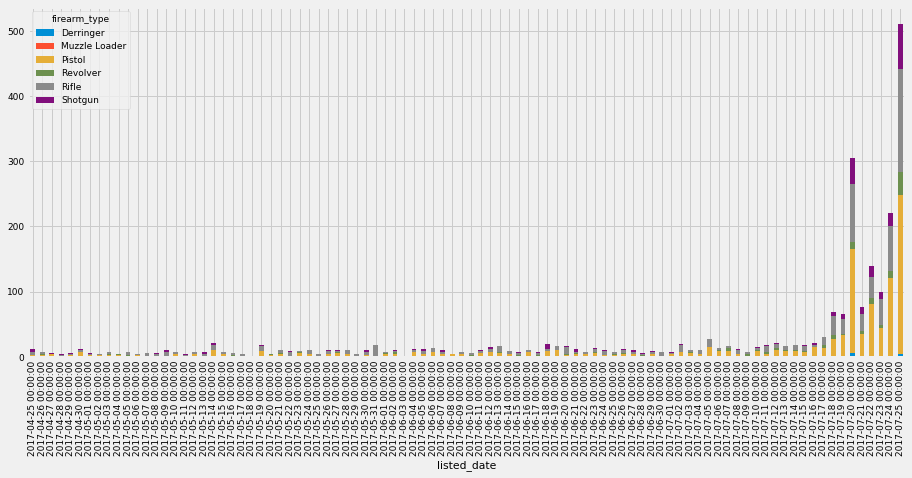

In [42]:
pivot_by_type = df[['post_id', 'listed_date', 'firearm_type']].groupby(['listed_date', 'firearm_type'])
counts = pivot_by_type.count()
counts = counts.unstack(level=1)
counts.columns = counts.columns.get_level_values(1)
counts.plot(kind='bar', stacked=True)

## By city

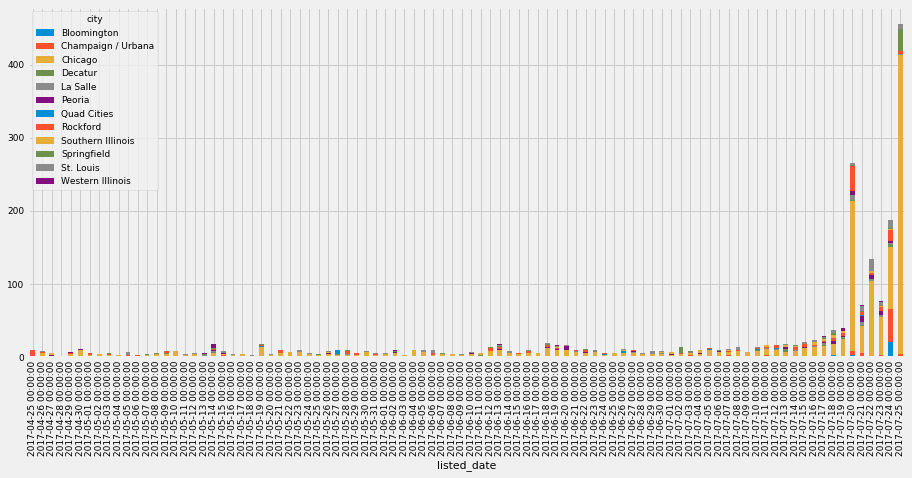

In [43]:
pivot_by_type = df[['post_id', 'listed_date', 'city']].groupby(['listed_date', 'city'])
counts = pivot_by_type.count()
counts = counts.unstack(level=1)
counts.columns = counts.columns.get_level_values(1)
counts.plot(kind='bar', stacked=True)

# Scratchpad / reference

Ignore this if you don't need to remember column names and such.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 20 columns):
url                           2498 non-null object
post_id                       2498 non-null int64
title                         2498 non-null object
listed_date                   2498 non-null object
price                         2498 non-null object
location                      2498 non-null object
city                          2022 non-null object
state                         2498 non-null object
description                   2498 non-null object
registered                    2498 non-null bool
category                      2498 non-null object
manufacturer                  2098 non-null object
caliber                       2199 non-null object
action                        2075 non-null object
firearm_type                  2400 non-null object
party                         2498 non-null object
img                           2395 non-null object
related_ids                  

In [28]:
df.head()

,url,post_id,title,listed_date,price,location,city,state,description,registered,category,manufacturer,caliber,action,firearm_type,party,img,related_ids,number_of_related_listings,has_foid
0,http://www.armslist.com/posts/7117684/chicago-...,7117684,For Sale/Trade: Ruger LCR 9mm with 6 moonclip...,2017-07-25 00:00:00,500,Schiller Park,Chicago,Illinois,Selling a Ruger LCR in 9mm (model# 05456) that...,True,Handguns,Ruger,NaN,Double Action,Revolver,Private,https://s3.amazonaws.com/mgm-content/sites/arm...,"7095490,7117039,7117684",3,False
1,http://www.armslist.com/posts/6952435/illinois...,6952435,For Sale: HK SP5K PARTS ALL BRAND NEW,2017-07-25 00:00:00,600,Lake Zurich,NaN,Illinois,$120 (2) HK 30rd Magazines \n$300 B & T Thread...,True,Handguns,Heckler & Koch,9mm Luger (9x19),NaN,NaN,Private,https://s3.amazonaws.com/mgm-content/sites/arm...,6952435,1,False
2,http://www.armslist.com/posts/7082966/illinois...,7082966,For Sale: Smith & Wesson K-22 Long Rifle,2017-07-25 00:00:00,700,Illinois,NaN,Illinois,Smith & Wesson K-22 Long Rifle. In good and pe...,False,Handguns,Smith & Wesson,22 Long Rifle,NaN,Revolver,Private,https://s3.amazonaws.com/mgm-content/sites/arm...,"7082966,7083042",2,False
3,http://www.armslist.com/posts/7117478/illinois...,7117478,For Sale: Brand new Phoenix Arms Nickel 22lr...,2017-07-25 00:00:00,125,Grundy county,NaN,Illinois,"Brand New in box with all factory gear, Phoeni...",True,Handguns,Phoenix Arms,22 Long Rifle,NaN,Pistol,Private,https://s3.amazonaws.com/mgm-content/sites/arm...,"6400204,7117478",2,False
4,http://www.armslist.com/posts/7063284/chicago-...,7063284,For Sale/Trade: BROWNING MEDALLION 28 GAUGE S...,2017-07-25 00:00:00,900,Lockport,Chicago,Illinois,"BROWNING MEDALLION 28 GAUGE SPECIAL EDITION, B...",True,Shotguns,Browning,28 Gauge,Pump Action,Shotgun,Private,https://s3.amazonaws.com/mgm-content/sites/arm...,"7063284,7104296,7104579",3,False
